
COLOR PALETTE IMDB:
Arancione = #deb522
Nero = 	#0c0b00
Azzurro = #128bb5
Arancione chiaro = #f2db83

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.colors import LinearSegmentedColormap

# Data Understanding & Preparation

## Data Semantics
 • Introduce the variables with their meaning and characteristics;

In [3]:
df = pd.read_csv('imdb.csv')

### Type delle variabili

In [4]:
df.dtypes

originalTitle                   object
rating                          object
startYear                        int64
endYear                         object
runtimeMinutes                  object
awardWins                        int64
numVotes                         int64
worstRating                      int64
bestRating                       int64
totalImages                      int64
totalVideos                      int64
totalCredits                     int64
criticReviewsTotal               int64
titleType                       object
awardNominationsExcludeWins      int64
canHaveEpisodes                   bool
isRatable                         bool
isAdult                          int64
numRegions                       int64
userReviewsTotal                 int64
ratingCount                      int64
countryOfOrigin                 object
genres                          object
castNumber                       int64
companiesNumber                  int64
averageRating            

In [5]:
df['endYear'] = pd.to_numeric(df['endYear'], errors='coerce')
df['awardWins'] = pd.to_numeric(df['awardWins'], errors='coerce')
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
df['isAdult'] = df['isAdult'].astype(bool)

df.dtypes

originalTitle                   object
rating                          object
startYear                        int64
endYear                        float64
runtimeMinutes                 float64
awardWins                        int64
numVotes                         int64
worstRating                      int64
bestRating                       int64
totalImages                      int64
totalVideos                      int64
totalCredits                     int64
criticReviewsTotal               int64
titleType                       object
awardNominationsExcludeWins      int64
canHaveEpisodes                   bool
isRatable                         bool
isAdult                           bool
numRegions                       int64
userReviewsTotal                 int64
ratingCount                      int64
countryOfOrigin                 object
genres                          object
castNumber                       int64
companiesNumber                  int64
averageRating            

In [6]:
df_copy = df.copy()
df_copy.rename(columns={'awardNominationsExcludeWins':'AwNmExWins'},inplace=True)

### Statistics

In [7]:
numeric_df = df_copy.select_dtypes(include=[np.number])

# Calcolare le statistiche descrittive
desc = numeric_df.describe().round(2)

desc = desc.drop(columns=['endYear', 'worstRating', 'bestRating', 'ratingCount'])

desc

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,numRegions,userReviewsTotal,castNumber,companiesNumber,averageRating,externalLinks,writerCredits,directorsCredits,quotesTotal
count,149531.00,109336.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00,149531.00
mean,1994.94,56.85,0.31,1085.13,9.53,0.24,57.62,2.19,0.42,2.85,5.57,19.52,5.82,6.87,5.18,2.00,0.95,1.07
std,24.89,46.63,2.91,19999.73,101.65,5.08,154.17,13.94,4.38,5.30,66.40,82.62,19.66,1.35,19.93,2.47,0.80,7.03
min,1878.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,1981.00,24.00,0.00,12.00,1.00,0.00,16.00,0.00,0.00,1.00,0.00,5.00,1.00,6.10,0.00,0.00,1.00,0.00
50%,1999.00,48.00,0.00,28.00,1.00,0.00,34.00,0.00,0.00,1.00,0.00,12.00,2.00,7.10,1.00,1.00,1.00,0.00
75%,2015.00,87.00,0.00,107.00,4.00,0.00,64.00,0.00,0.00,3.00,1.00,21.00,5.00,7.80,3.00,3.00,1.00,0.00
max,2024.00,5220.00,446.00,2947931.00,20586.00,1063.00,25218.00,628.00,650.00,100.00,11289.00,10649.00,597.00,10.00,744.00,51.00,58.00,1084.00


In [8]:
primo_Nlarge = df_copy['numVotes'].nlargest(1).iloc[-1]
primo_large = df_copy['originalTitle'].loc[df_copy['numVotes'] == primo_Nlarge]
secondo_Nlarge = df_copy['numVotes'].nlargest(2).iloc[-1]
secondo_large = df_copy['originalTitle'].loc[df_copy['numVotes'] == secondo_Nlarge]
terzo_Nlarge = df_copy['numVotes'].nlargest(3).iloc[-1]
terzo_large = df_copy['originalTitle'].loc[df_copy['numVotes'] == terzo_Nlarge]
print(primo_large, primo_Nlarge)
print(secondo_large, secondo_Nlarge)
print(terzo_large, terzo_Nlarge)

15493    The Shawshank Redemption
Name: originalTitle, dtype: object 2947931
18571    Fight Club
Name: originalTitle, dtype: object 2379685
15456    Pulp Fiction
Name: originalTitle, dtype: object 2263744


## Assessing data quality
• Are present errors, outliers, missing values, semantic inconsistencies, etc?

### Missing Value

In [9]:
df_copy.isna().sum()

originalTitle              0
rating                     0
startYear                  0
endYear               143897
runtimeMinutes         40195
awardWins                  0
numVotes                   0
worstRating                0
bestRating                 0
totalImages                0
totalVideos                0
totalCredits               0
criticReviewsTotal         0
titleType                  0
AwNmExWins                 0
canHaveEpisodes            0
isRatable                  0
isAdult                    0
numRegions                 0
userReviewsTotal           0
ratingCount                0
countryOfOrigin        39987
genres                     0
castNumber                 0
companiesNumber            0
averageRating              0
regions                    0
externalLinks              0
writerCredits              0
directorsCredits           0
soundMixes                 0
quotesTotal                0
dtype: int64

Per country of origin possiamo mettere \N come è nel caso di genre e altri

In [10]:
df_copy['countryOfOrigin'] = df_copy['countryOfOrigin'].fillna('\\N')
df_copy['countryOfOrigin']

0         ['US']
1         ['FR']
2         ['US']
3         ['US']
4         ['FR']
           ...  
149526    ['CO']
149527    ['ES']
149528        \N
149529        \N
149530        \N
Name: countryOfOrigin, Length: 149531, dtype: object

In [11]:
df_copy = df_copy.drop('endYear', axis=1)

In [12]:
df_copy['runtimeMinutes'] = df_copy['runtimeMinutes'].fillna(0)

### Rimozione Variabili irrilevanti

In [13]:
df_copy['numVotes'].corr(df_copy['ratingCount'])
# The two variables 'numVotes' and 'ratingCount' represent the same attribute, so we can eliminate one of them.

df_copy = df_copy.drop(['bestRating', 'worstRating','isRatable'], axis=1)

In [14]:
df_copy = df_copy.drop(['ratingCount'], axis=1)

### Correlation

In [15]:
numeric_df = df_copy.select_dtypes(include=[np.number])

# Calcolare le statistiche descrittive
correlation_matrix = numeric_df.corr(method='spearman').round(2)

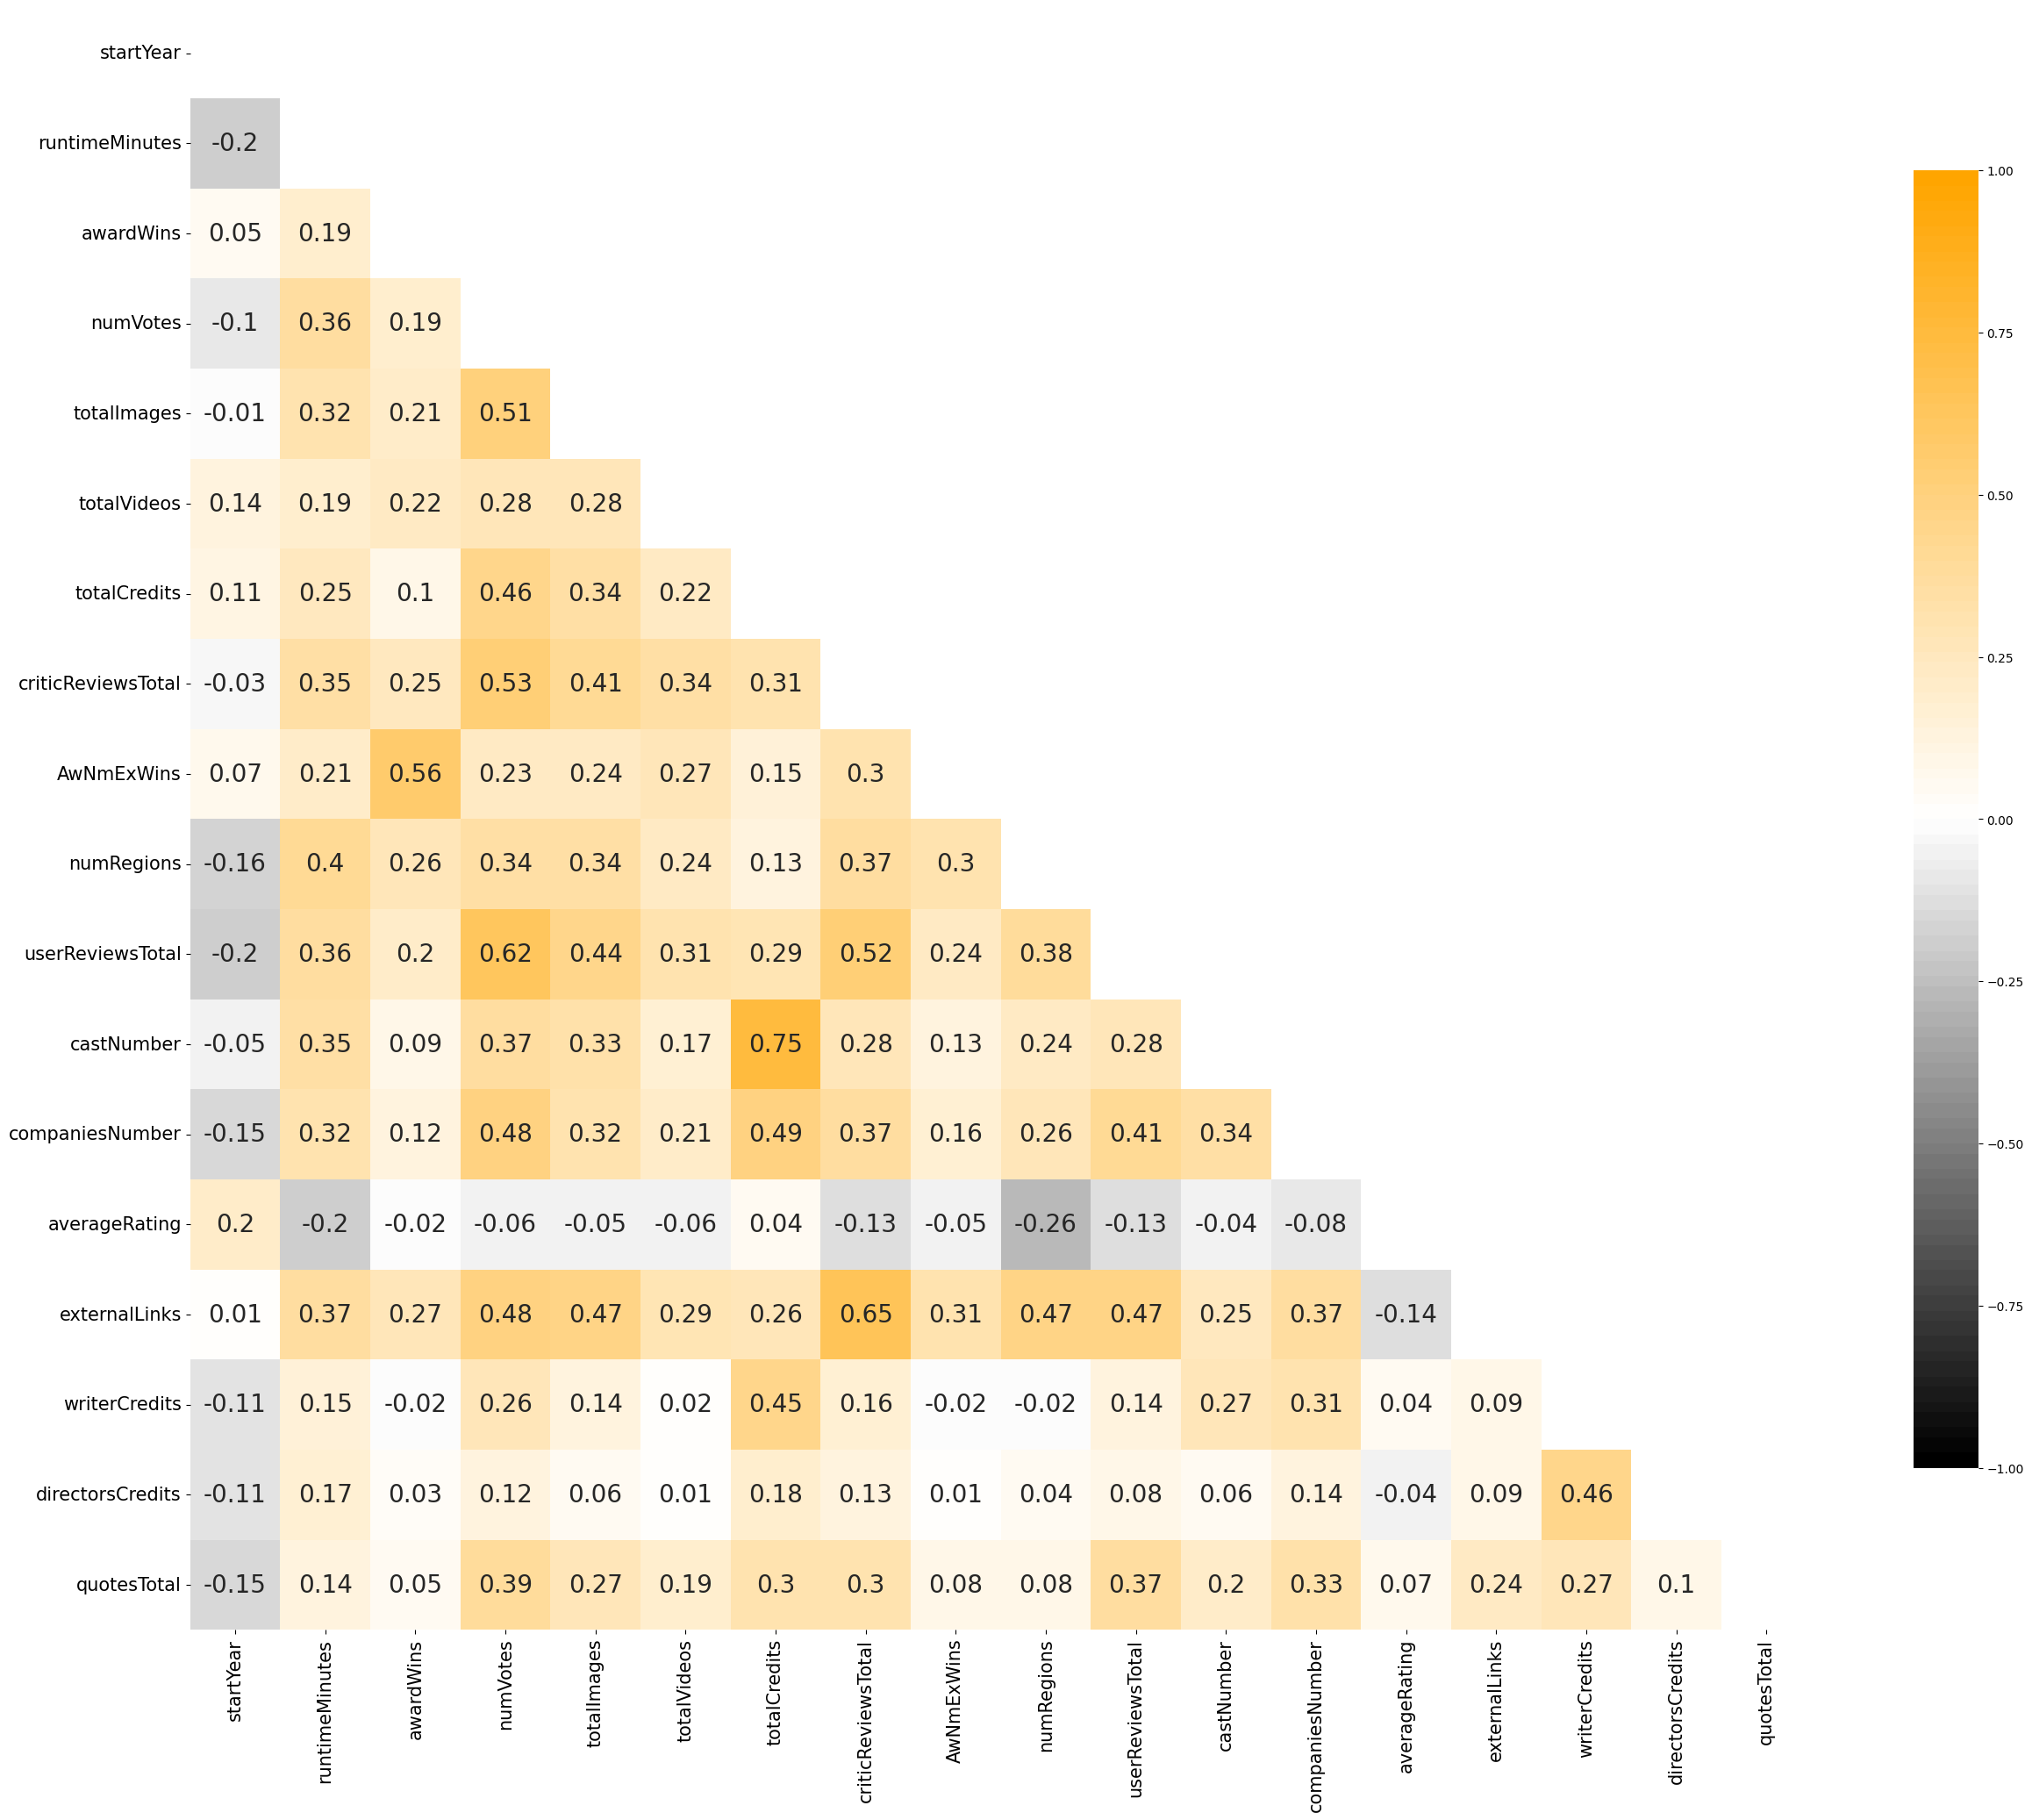

In [16]:
# Maschera per il triangolo superiore
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Impostare la figura di matplotlib
plt.figure(figsize=(30, 24))

# Creare una colormap personalizzata
colors = ["black", "white", "#FFA500"]
n_bins = 100  # Discretizzare la colormap
cmap_name = "custom_cmap"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Disegnare la heatmap con una barra dei colori e aggiungere i numeri nei quadratini
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 20}, cmap=cm, square=True,
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1, center=0, mask=mask)

# Aggiungere un titolo
# plt.title('Pearson correlation matrix', fontsize=50)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)

# Mostrare il grafico
plt.show()

### Encoding

In [162]:
# Trasformare il dataset per avere 1 quando è True e 0 quando è False per 'canHaveEpisodes' e 'isAdult'
df_copy['canHaveEpisodes'] = df_copy['canHaveEpisodes'].astype(int)
df_copy['isAdult'] = df_copy['isAdult'].astype(int)

### Log-trasform

In [163]:
import numpy as np

# Creare una copia del DataFrame
log_transformed_df = df_copy.copy()

# Lista delle variabili per applicare la trasformazione logaritmica
variables = [
    'numVotes', 'awardWins', 'AwNmExWins', 'criticReviewsTotal', 
    'userReviewsTotal', 'totalImages', 'totalVideos', 
    'castNumber', 'companiesNumber', 'externalLinks', 
    'writerCredits', 'directorsCredits', 'quotesTotal'
]

# Applicare la trasformazione logaritmica a ciascuna variabile
for var in variables:
    log_transformed_df[var] = np.log1p(log_transformed_df[var])

# Visualizzare il nuovo DataFrame
log_transformed_df

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,...,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.000000,4,1.386294,...,"Documentary,Short",0.693147,1.386294,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",2.302585,0.000000,0.693147,['silent'],0.0
1,Un bon bock,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.000000,2,0.000000,...,"Animation,Short",0.000000,0.000000,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",1.386294,0.000000,0.693147,['silent'],0.0
2,Chinese Opium Den,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.000000,1,0.000000,...,Short,0.000000,0.693147,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",1.609438,0.000000,0.693147,['silent'],0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.000000,4,1.098612,...,"Documentary,Short",0.693147,1.945910,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",1.945910,0.000000,0.693147,['silent'],0.0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1.0,0.000000,9.481588,2.564949,0.000000,11,2.833213,...,"Documentary,Short",1.945910,1.791759,7.4,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",3.091042,0.000000,1.098612,['silent'],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",1993,96.0,0.000000,2.484907,0.000000,0.000000,11,0.000000,...,Documentary,0.000000,1.098612,7.0,"['\\N', 'CO']",0.693147,0.693147,0.693147,[],0.0
149527,Eco,"(6, 7]",2019,14.0,0.000000,2.772589,1.609438,0.693147,52,0.693147,...,"Drama,Short",1.945910,1.386294,6.4,"['\\N', 'ES']",1.791759,0.693147,0.693147,[],0.0
149528,Women Take Center Stage,"(5, 6]",2019,0.0,0.000000,2.564949,1.098612,1.386294,32,0.000000,...,Reality-TV,0.693147,0.000000,5.6,['\\N'],0.000000,0.000000,0.000000,[],0.0
149529,Horrid Henry and the Christening Crisis,"(7, 8]",2011,10.0,0.000000,2.302585,0.693147,0.000000,15,0.000000,...,"Adventure,Animation,Comedy",2.079442,0.000000,7.1,['\\N'],0.000000,1.386294,0.693147,[],0.0


In [164]:
numeric_dflog = log_transformed_df.select_dtypes(include=[np.number])

In [ ]:
log_transformed_df.to_csv('imbd_log.csv', index=False)

### Feature Scaling

In [166]:
from sklearn.preprocessing import MinMaxScaler

# Inizializza e applica MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_dflog), columns=numeric_dflog.columns)

# Ricombina con le colonne non numeriche
df_minmax = df_copy.copy()
df_minmax[numeric_dflog.columns] = df_scaled

df_minmax

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,...,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",0.109589,0.000192,0.000000,0.446641,0.110609,0.00000,0.000159,0.215125,...,"Documentary,Short",0.074746,0.216826,0.522222,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",0.348170,0.000000,0.169992,['silent'],0.0
1,Un bon bock,"(5, 6]",0.095890,0.002299,0.000000,0.261214,0.110609,0.00000,0.000079,0.000000,...,"Animation,Short",0.000000,0.000000,0.488889,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",0.209620,0.000000,0.169992,['silent'],0.0
2,Chinese Opium Den,"(4, 5]",0.109589,0.000192,0.000000,0.266035,0.069786,0.00000,0.000040,0.000000,...,Short,0.000000,0.108413,0.444444,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",0.243361,0.000000,0.169992,['silent'],0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",0.109589,0.000192,0.113583,0.451861,0.139573,0.00000,0.000159,0.170483,...,"Documentary,Short",0.074746,0.304353,0.488889,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",0.294238,0.000000,0.169992,['silent'],0.0
4,L'arrivée d'un train à La Ciotat,"(7, 8]",0.123288,0.000192,0.000000,0.586792,0.258240,0.00000,0.000436,0.439658,...,"Documentary,Short",0.209840,0.280243,0.711111,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",0.467392,0.000000,0.269430,['silent'],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149526,Nuestra película,"(6, 7]",0.787671,0.018391,0.000000,0.052892,0.000000,0.00000,0.000436,0.000000,...,Documentary,0.000000,0.171830,0.666667,"['\\N', 'CO']",0.104810,0.175425,0.169992,[],0.0
149527,Eco,"(6, 7]",0.965753,0.002682,0.000000,0.074845,0.162039,0.09945,0.002062,0.107563,...,"Drama,Short",0.209840,0.216826,0.600000,"['\\N', 'ES']",0.270929,0.175425,0.169992,[],0.0
149528,Women Take Center Stage,"(5, 6]",0.965753,0.000000,0.000000,0.059000,0.110609,0.19890,0.001269,0.000000,...,Reality-TV,0.074746,0.000000,0.511111,['\\N'],0.000000,0.000000,0.000000,[],0.0
149529,Horrid Henry and the Christening Crisis,"(7, 8]",0.910959,0.001916,0.000000,0.038980,0.069786,0.00000,0.000595,0.000000,...,"Adventure,Animation,Comedy",0.224239,0.000000,0.677778,['\\N'],0.000000,0.350850,0.169992,[],0.0
